In [36]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

In [5]:
#load dataset
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
df.shape

(400, 9)

In [16]:
df = df.drop('Serial No.',axis=1)

In [17]:
df.shape

(400, 8)

In [18]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1,0.92
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1,0.76
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1,0.72
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1,0.80
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0,0.65


In [23]:
# Data pre-processing
# Check for missing values
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [19]:
# Label Encoding
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1,0
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0,0


In [24]:
# Splitting the dataset into train and test sets
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y = df['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [25]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_train {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (300, 7)
y_train (300,)
y_train (100, 7)
y_test (100,)


In [27]:
model_dt = DecisionTreeRegressor(random_state=1)
model_rf = RandomForestRegressor(random_state=1)
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

In [31]:
# Applying model - decision tree
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [32]:
# Applying model - random forest regressor
model_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [33]:
# Applying model - linear regressor
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [34]:
y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_lr = model_lr.predict(x_test)

In [35]:
y_pred_rf = [1 if each > 0.75 else 0 for each in y_pred_rf]

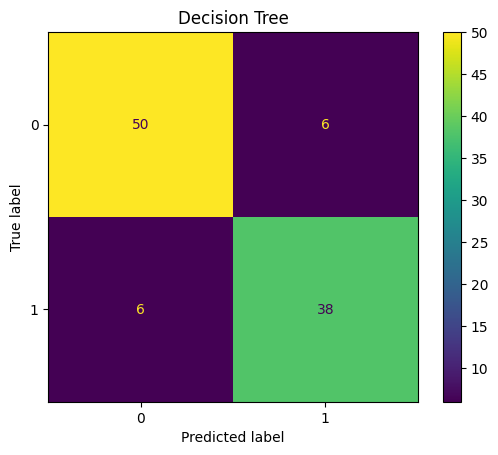

 Accuracy is 0.88
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.86      0.86      0.86        44

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [37]:
# Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}")
print(classification_report(y_test,y_pred_dt))

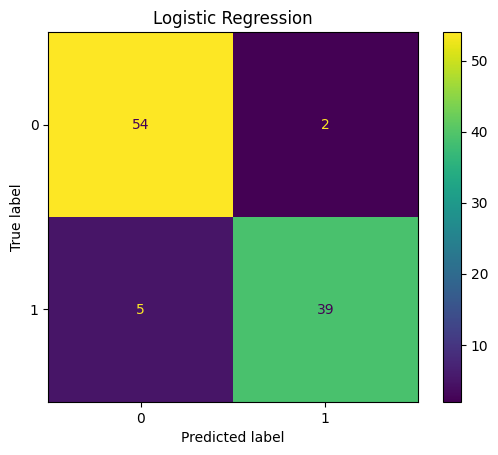

 Accuracy is 0.93
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.95      0.89      0.92        44

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [38]:
# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

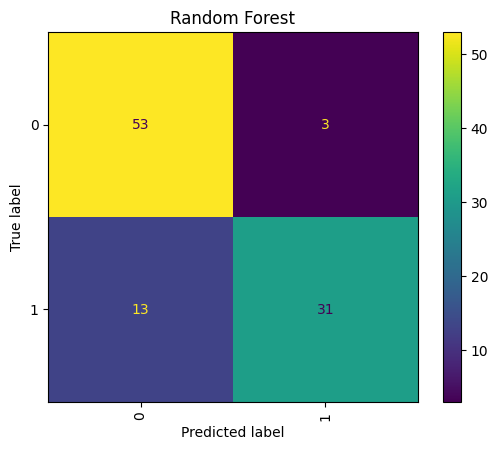

 Accuracy is 0.84
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        56
           1       0.91      0.70      0.79        44

    accuracy                           0.84       100
   macro avg       0.86      0.83      0.83       100
weighted avg       0.85      0.84      0.84       100



In [39]:
# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf,xticks_rotation='vertical')
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))